# Support Vector Machine (SVM)

The main idea of the SVM is to find the maximally separating hyperplane



In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import pandas as pd


In [101]:
class SVM:
    def __init__(self, visualization = True):
        self.visualization = visualization
        self.colors = {1:'r', -1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)

    def draw_background(self):
        self.__init__()
            
    def predict(self, features): # Input features
        def sign(x):
            return -1 if x < 0 else (1 if x > 0 else 0)
        print(np.dot(features, self.weights) + self.bias)
        classification = sign(np.dot(features, self.weights) + self.bias)
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0], features[1], s = 200, marker = '*', \
                            color = self.colors[classification])
        else:
            print('featureset',features,'is on the decision boundary')            
        return classification
    def visualize(self):
        [[self.ax.scatter(x[0], x[1], s = 100, color = self.colors[yi]) 
                                            for x in data_dict[yi]] 
                                            for yi in data_dict.keys()]
        # Why formula?
     
        def hyperplane(x, w, b, v):
            # v = wx + b
            return (-w[0]*x - b + v) / w[1] # known x1 => find x2
        
        hyp_min_x = self.min_feature_value * 0.9
        hyp_max_x = self.max_feature_value * 1.1
        
        # positive support vextor hyperplane
        # w*x + b = 1
        psv1 = hyperplane(hyp_min_x, self.weights, self.bias, 1)
        psv2 = hyperplane(hyp_max_x, self.weights, self.bias, 1)
        self.ax.plot([hyp_min_x, hyp_max_x], [psv1, psv2], 'k')
        
        # negative support vector hyperplane
        # w*x + b = -1
        nsv1 = hyperplane(hyp_min_x, self.weights, self.bias, -1)
        nsv2 = hyperplane(hyp_max_x, self.weights, self.bias, -1)
        self.ax.plot([hyp_min_x, hyp_max_x], [nsv1, nsv2], 'k')
        
        # decision boundary
        # w*x + b = 0
        db1 = hyperplane(hyp_min_x, self.weights, self.bias, 0)
        db2 = hyperplane(hyp_max_x, self.weights, self.bias, 0)
        self.ax.plot([hyp_min_x, hyp_max_x], [db1, db2], '--')
        
    def fit(self, dataset):
        self.dataset = dataset
        
        # optimization dictionary
        # xi.w + b <= -1 if yi = -1 (belongs to -ve class)
        # xi.w + b >= +1 if yi = +1 (belongs to +ve class)
        # ==> yi(xi.w+b) >= 1
        opt_dict ={} # {||w|| : [w,b]} where ||w|| = dist(margin, point)}
        
        transforms = [[1, 1],
                     [-1, 1],
                     [1, -1],
                     [-1, -1]]
        all_data = []
        
        for yi in self.dataset.keys():
            for features in self.dataset[yi]:
                for feature in features:
                    all_data.append(features)
        self.max_feature_value = np.max(all_data)
        self.min_feature_value = np.min(all_data)
        # no need to keep this memory.
        all_data=None
        
        # Depend on how precise you want to get
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # starts getting very high cost after this.
                      self.max_feature_value * 0.001]
#                      self.max_feature_value * 0.0001,]
        
        # extremely expensive >>??
        b_range_multiple = 5
        b_multiple = 5
        latest_optimum = self.max_feature_value*10
        
        for step in step_sizes: # 3
            w = np.array([latest_optimum, latest_optimum])
            # Convex ??
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value * b_range_multiple),
                                self.max_feature_value * b_range_multiple,
                                step * b_multiple): # loop to find b
                    for transform in transforms: # loop to find w_t
                        w_t = w * transform
                        found_option = True 
                        # weakest link in the SVM fundamentally ?
                        # SMO fixed this a bit
                        for yi in self.dataset.keys():
                            for xi in self.dataset[yi]:
                                # yi(xi*w + b) >=1
                                if not yi*(np.dot(xi, w_t) + b) >=1: # if one case not 
                                                                     # satisfy => break all 
                                    found_option = False
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t, b]
                if w[0] < 0: # Heuristic, w : latest_optimum => 0 is enough to train
                    optimized = True
                    print ('Optimize a step')
                else:
                    w = w - step # Move to local optimum
                    
            # Find the minimum ||w||
            norm = sorted([x for x in opt_dict.keys()])
            print(norm[0], opt_dict[norm[0]])
            opt_params = opt_dict[norm[0]]
            self.weights = opt_params[0] # w_t
            self.bias = opt_params[1] # b
            latest_optimum = opt_params[0][0] + 2*step # Plus 2*step, then 
                                                    # move back by dist = 
                                                    # step*0.1 in the next iteration
                                                    # to find more precise optimum
                        
data_dict = {
    -1: np.array([[0,5],[2,5],[0,3],[-1,4]]),
    1: np.array([[0,0],[-1,-1],[0,-5],[-1,0]])
}



Optimize a step
2.1213203435596424 [array([-1.5, -1.5]), 2.5]
Optimize a step
2.1213203435596424 [array([-1.5, -1.5]), 2.5]
Optimize a step
1.979898987322333 [array([ 1.4, -1.4]), 3.199999999998397]
1.799999999998397
0.39999999999839764
7.399999999998396
1.7999999999983967
-1.0000000000016023
w0, w1 1.4 -1.4
-2.9285714285725737
w0, w1 1.4 -1.4
7.071428571427426
w0, w1 1.4 -1.4
-1.5000000000011449
w0, w1 1.4 -1.4
8.499999999998854
w0, w1 1.4 -1.4
-2.2142857142868593
w0, w1 1.4 -1.4
7.785714285713141


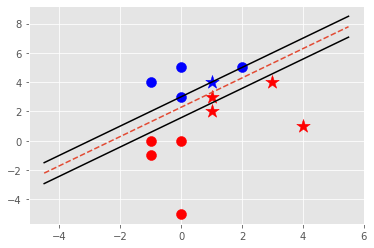

In [102]:
model = SVM()
model.fit(data_dict)
test_set = [
    [1,2],
    [1,3],
    [4,1],
    [3,4],
    [1,4]
]
for feature in test_set:
    model.predict(feature)
model.visualize()

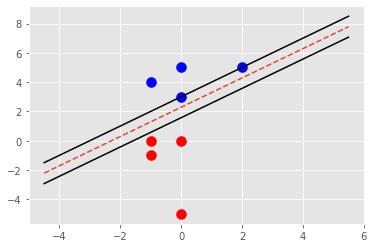

In [68]:
model.draw()
model.visualize()

In [89]:
test_set = [
    [1,2],
    [1,3],
    [4,1],
    [3,4],
    [1,4]
]
for feature in test_set:
    model.predict(feature)
model.visualize()

1.799999999998397
0.39999999999839764
7.399999999998396
1.7999999999983967
-1.0000000000016023


In [32]:
data_dict = {
    -1: np.array([[1,5],[2,5],[0,4]]),
    1: np.array([[0,0],[-1,-1],[0,-5]])
}
all_datas = []
for yi in data_dict.keys():
    for fs in data_dict[yi]:
        for f in fs:
            all_datas.append(f)
print(max(all_datas)*0.001)
    

0.005


In [28]:
import pandas as pd

df = pd.read_csv('data/Iris.csv')
df = df.drop(['Id'],axis=1)
target = df['Species']
s = set()
for val in target:
    s.add(val)
s = list(s)
rows = list(range(100,150))
df = df.drop(df.index[rows])

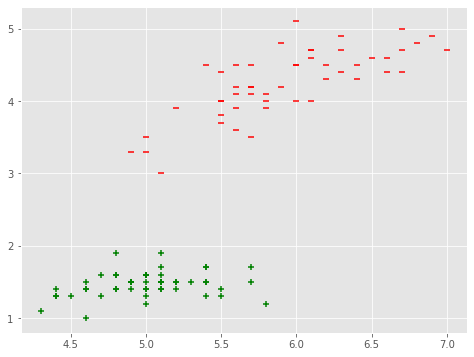

In [29]:
import matplotlib.pyplot as plt

x = df['SepalLengthCm']
y = df['PetalLengthCm']

setosa_x = x[:50]
setosa_y = y[:50]

versicolor_x = x[50:]
versicolor_y = y[50:]

plt.figure(figsize=(8,6))
plt.scatter(setosa_x,setosa_y,marker='+',color='green')
plt.scatter(versicolor_x,versicolor_y,marker='_',color='red')
plt.show()